# Homework 8 solutions

## 1. Neutron star composition

We want to look at chemical equilibrium for a neutron star to determine the relative fraction of neutrons, protons, and electrons.

Our balance equation is:

$$n \leftrightarrow p + e^- + Q$$

where $Q = 0.782~\mathrm{MeV}$.

### a.

Chemical equilibrium says that:

$$\mu_n = \mu_p + \mu_e$$

since we are degenerate, we can relate the chemical potential to the Fermi energy:

$$\mu = \mathcal{E}_F + mc^2$$

and then we have

$$\mathcal{E}_n + m_n c^2 = \mathcal{E}_p + m_p c^2 + \mathcal{E}_e + m_e c^2$$

or rearranging:

$$\mathcal{E}_n + [m_n - (m_p + m_e) ] c^2 = \mathcal{E}_p + \mathcal{E}_e$$

where we recognize the term $[\ldots]$ as $Q$.

This gives

$$\mathcal{E}_n + Q = \mathcal{E}_p + \mathcal{E}_e$$

### b.

Now we take the electrons to be relativistic, zero-temperature degenerate:

$$\mathcal{E}_e = p_e c = m_e c^2 x_{F,e}$$

with

$$x_{F,e} = \left (\frac{3}{8\pi} \right)^{1/3} \frac{h}{m_e c^2} n_e^{1/3}$$

and we take $n$ and $p$ to be non-relativistic, zero-temperature degenerate:

$$\mathcal{E}_n = m_n c^2 \frac{x_{F,n}^2}{2}$$

$$\mathcal{E}_p = m_n p^2 \frac{x_{F,p}^2}{2}$$

with

$$x_{F,\{p,n\}} = \left (\frac{3}{8\pi} \right)^{1/3} \frac{h}{m_{\{p,n\}} c^2} n_{\{p,n\}}^{1/3}$$

Putting this together, we have:

\begin{align*}
&\frac{1}{2} m_n c^2 \left ( \frac{3}{8\pi} \right )^{2/3} \left (\frac{h}{m_n c} \right )^2 n_n^{2/3} + Q = \\
&\qquad\frac{1}{2} m_p c^2 \left ( \frac{3}{8\pi} \right )^{2/3} \left (\frac{h}{m_p c} \right )^2 
n_p^{2/3} + m_e c^2 \left (\frac{3}{8\pi} \right )^{1/3} \frac{h}{m_e c} n_e^{1/3}
\end{align*}

Now, we can take $m_p \approx m_n \approx m_u$ in the above expression (since we are not subtracting the masses) and we can express the mass density as:

$$\rho = m_n n_n + m_p n_p + m_e n_e \sim m_u (n_p + n_e)$$

since $m_e \ll m_p$

The we have:

$$n_p = \frac{\rho}{m_u} - n_n$$

and charge neutrality requires that $n_e = n_p$, giving

\begin{align*}
&\frac{1}{2} m_u \left ( \frac{3}{8\pi} \right )^{2/3} \left (\frac{h}{m_u c} \right )^2 n_n^{2/3} + \frac{Q}{c^2} = \\
&\qquad\frac{1}{2} m_u \left ( \frac{3}{8\pi} \right )^{2/3} \left (\frac{h}{m_u c} \right )^2 
n_p^{2/3} + m_e \left (\frac{3}{8\pi} \right )^{1/3} \frac{h}{m_e c} n_p^{1/3}
\end{align*}

We can solve this system numerically

### c.

Here's our code to generate a numerical solution


In [1]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pylab as plt

In [4]:
# constants (CGS)
c = 3.e10
h = 6.63e-27
m_u = 1.67e-24
m_e = 9.11e-28

MeV_to_erg = 1.602e-12 * 1.e6

Q = 0.782 * MeV_to_erg

In [5]:
def saha(n_n, rho):

    n_p = rho/m_u - n_n

    a = (3.0/(8.0*np.pi))**(1./3.)

    # neutron
    x_n = a* (h/(m_u*c)) * n_n**(1./3.)
    p_n = m_u * c * x_n
    E_n = 0.5 * p_n**2 / m_u
    #E_n = m_u*c**2*( (1.0 + x_n**2)**0.5 - 1)

    # proton
    x_p = a * (h/(m_u*c)) * n_p**(1./3.)
    p_p = m_u * c * x_p
    E_p = 0.5 *p_p**2 / m_u
    #E_p = m_u*c**2*( (1.0 + x_p**2)**0.5 - 1)

    # electron
    x_e = a * (h/(m_e*c)) * n_p**(1./3.)
    p_e = m_e * c * x_e
    E_e = p_e * c
    #E_e = m_e*c**2*( (1.0 + x_e**2)**0.5 - 1)

    f = E_n + Q - E_p - E_e

    return f

In [6]:
rho_v = []
np_nn = []
for rho in np.logspace(np.log10(3.e7), np.log10(5.e15), 100):
    n_n_max = rho / m_u

    n_n = optimize.brentq(saha, 0.0001*n_n_max, n_n_max, args=(rho))
    n_p = rho/m_u - n_n

    rho_v.append(rho)
    np_nn.append(n_p/(n_p + n_n))

Text(0, 0.5, '$n_p / (n_p + n_n)$')

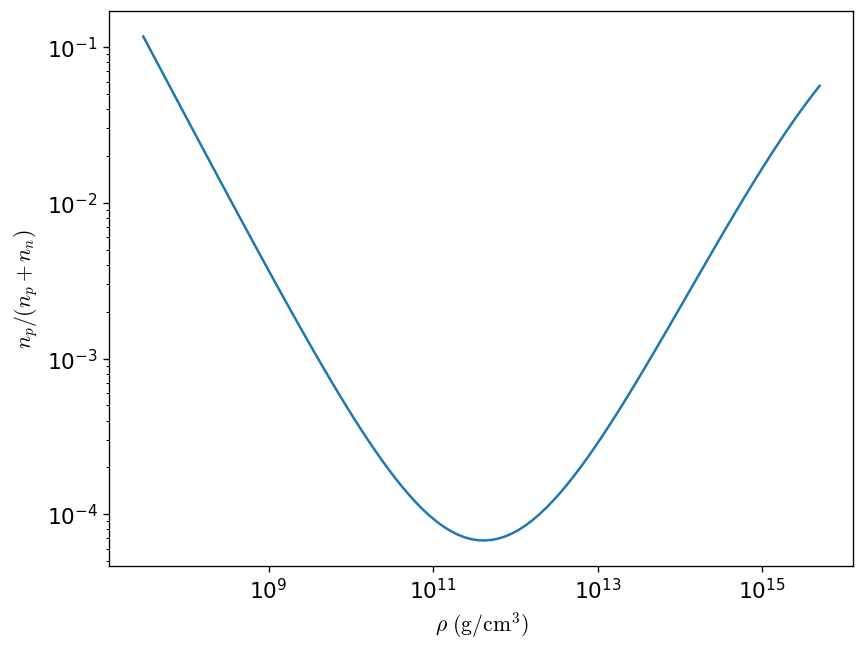

In [7]:
fig, ax = plt.subplots()

ax.loglog(rho_v, np_nn)
ax.set_xlabel(r"$\rho~ (\mathrm{g}/\mathrm{cm}^{3})$")
ax.set_ylabel(r"$n_p / (n_p + n_n)$")

We see that the number of protons is always small compared to the number of neutrons

## 2. X-ray bursts

We want to understand the depth at which H burns in an X-ray burst

### a.

We define column depth as:

$$dy = -\rho dz$$

starting with HSE:

$$\frac{dP}{dz} = -\rho |g|$$

we can write this as:

$$-\frac{1}{\rho} \frac{dP}{dz} = \frac{dP}{dy} = |g|$$

this can be integrated trivally together with the boundary condition that $P(y = 0) = 0$ to give:

$$P = |g| y$$

### b.

The change in H mass fraction is given by:

$$\frac{dX}{dt} = -\frac{\epsilon_H}{E}$$

where $\epsilon_H$ is a constant (it is the hot-CNO rate, which we say in a previous homework is temperature independent).  

Taking

$$E \sim 6.4\times 10^{18}~\mathrm{erg/g}$$

and 

$$\epsilon_H = 5.9\times 10^{15} Z_\mathrm{CNO}~\mathrm{erg/g/s}$$

we have:

$$X(t) = X(t= 0) - \frac{\epsilon_H}{E}$$

but we want all of the H to be consumed, which means $X(t) = 0$.  This gives:

$$t = \frac{X_0 E}{\epsilon_H} = \frac{X_0 \cdot 6.4\times 10^{18}~\mathrm{erg/g}}{5.9\times 10^{15} Z_\mathrm{CNO}~\mathrm{erg/g/s}} = 1080 \frac{X_0}{Z_\mathrm{CNO}}~\mathrm{s}$$

For a typical $Z_\mathrm{CNO} \approx 0.01$, this is:

$$t = 30 X_0 \left (\frac{0.01}{Z_\mathrm{CNO}}\right)~\mathrm{hr}$$

### c.

The column accretion rate is

$$\dot{m} = \frac{dy}{dt}$$

so we can write:

$$\frac{dX}{dt} = \frac{dX}{dy}\frac{dy}{dt} = \dot{m} \frac{dX}{dy} = -\frac{\epsilon_H}{E}$$

We can integrate this as:

$$X(y) = X(y = 0) - \frac{\epsilon_H}{\dot{m} E} y$$

where $X(y = 0) = X_0$, the surface / accreted amount of H.

### d. 

The critical column depth where all of the H is burned is $X(y_\mathrm{crit}) = 0$, giving:

$$y_\mathrm{crit} = \frac{\dot{m} E X_0}{\epsilon_H}$$

and we can write this as:

$$X(y) = X_0 \left (1 - \frac{y}{y_\mathrm{crit}} \right )$$

Now we want to evaluate this.  Start with the Eddington accretion rate:

$$\dot{m}_\mathrm{Edd} = \frac{2 m_p c}{1 + X}\frac{1}{R \sigma_T}$$

with $\sigma_T = 6.65\times 10^{-25}~\mathrm{cm^2}$.  This gives:

$$\dot{m}_\mathrm{Edd} = 8.86\times 10^4 \left ( \frac{1.7}{1 + X} \right )~\mathrm{g/cm^2/s}$$

and 

\begin{align*}
y_d &= \frac{X_0 E \dot{m}_\mathrm{Edd}}{\epsilon_H} \left ( \frac{\dot{m}}{\dot{m}_\mathrm{Edd}}\right ) \\
    &= 6.8\times 10^9 \left (\frac{X_0}{0.7}\right) \left (\frac{1.7}{1+X}\right ) \left ( \frac{\dot{m}}{\dot{m}_\mathrm{Edd}}\right ) \left (\frac{Z_\mathrm{CNO}}{0.01}\right)^{-1}~\mathrm{g/cm^2/s}
\end{align*}